In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import calculation_functions as cf

In [2]:
# building parameters
thickness = cf.thickness
length = cf.length
height = cf.height
setup_height = cf.setup_height

In [3]:
def our_plot(x, y, title, xlabel, ylabel, labels=[' '],xmin=0, xmax=90):
    plt.figure(figsize=(6.7, 6))  # (width, height in inches)

    color = ['b', 'orange', 'green']
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i], color=color[i], linewidth = 2)
    
    plt.title(title, fontsize=14)#, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    
    plt.xlim(xmin, xmax)
    #plt.ylim(0, 7e6)
    
    # plt.xticks(np.arange(0, 11, 2))  # Set x-ticks at 0, 2, 4, 6, 8, 10
    # plt.yticks(np.arange(0, 9, 1))   # Set y-ticks at 0, 1, 2, ... 8
    
    plt.tick_params(axis='both', which='major', labelsize=10, direction='in')

    plt.legend(loc='upper right', fontsize=10)

    
    # plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    
    plt.show()

# Plots

### Pathlength

In [4]:
ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

tot_path = np.array([cf.total_path(theta, ceiling, length) for theta in t[1]])

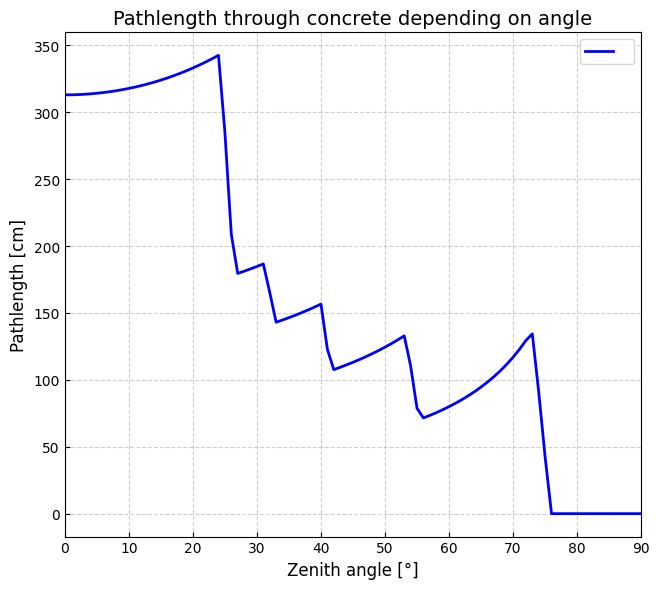

In [5]:
our_plot(t[0], np.array([tot_path]), 'Pathlength through concrete depending on angle', 'Zenith angle [°]', 'Pathlength [cm]')

### Calculate complete energy loss

$E_{loss} = \frac{dE}{dx} * \rho * l$

ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

En_loss = np.array([cf.E_loss(theta, ceiling, length, cf.dEdx, cf.rho) for theta in t[1]])

our_plot(t[0], np.array([En_loss]), 'Total Energy loss through the concrete', 'Zenith angle in degree', 'Energy loss in GeV')

### Calculate muon flux from Shukla equation

$I(E, \theta) = I_0 N (E_0 + E)^{-n} D(\theta)^{-(n-1)}$

$D_2(\theta) = \frac{1}{cos(\theta)}$

In [6]:
theta_starts = cf.thetas(0, 90, cf.binsize)
ceiling_b = cf.ceil_b(thickness, height, setup_height)
ceiling_3 = cf.ceil_3(thickness, height, setup_height)

In [7]:
I_3floor = np.array([cf.I_in(cf.mean_theta(theta), ceiling_3, length) for theta in theta_starts[1]])
I_3floor

array([38.14078343, 37.4049849 , 35.9623086 , 33.86954098, 31.20924799,
       28.0867035 , 24.6258961 , 20.96468891, 17.2492079 , 13.62752014,
       10.24262602,  7.22471879,  4.68254341,  2.69349758,  1.58837128,
        1.82052465,  1.27960043,  0.18375763])

In [8]:
I_basement = np.array([cf.I_in(cf.mean_theta(theta), ceiling_b, length) for theta in theta_starts[1]])
I_basement

array([22.96722956, 22.46748162, 21.49115438, 20.08351462, 18.30981245,
       16.25217409, 19.16808746, 20.35691631, 20.08650851, 16.01881092,
       15.35475951, 11.22452954, 10.42742159,  6.74624246,  3.74884793,
        1.82052465,  1.27960043,  0.18375763])

In [9]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling_3, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result 3rd floor: {result} Hz/m²")

Result 3rd floor: 67.2718164888607 Hz/m²


In [10]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling_b, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result inside: {result} Hz/m²")

Result inside: 66.36329351183568 Hz/m²


In [11]:
74/117.33

0.6306997357879486

In [12]:
32451/50980

0.6365437426441742

In [13]:
5/8

0.625

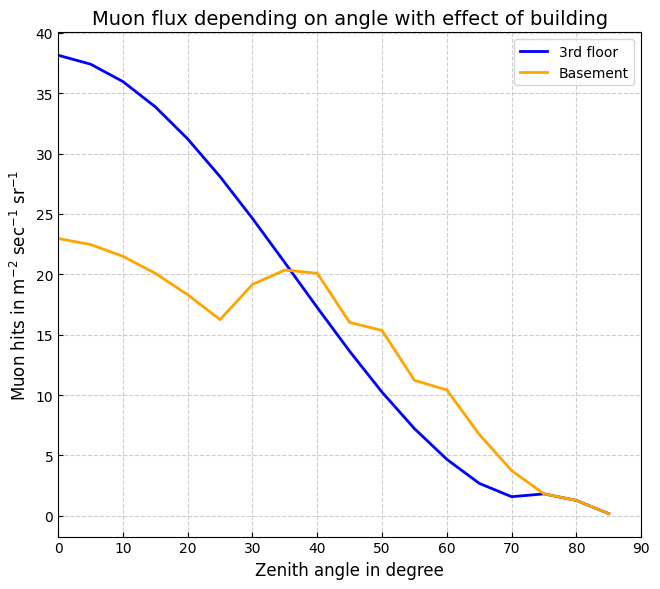

In [14]:
our_plot(theta_starts[0], np.array([I_3floor, I_basement]),
         'Muon flux depending on angle with effect of building',
         'Zenith angle in degree',
         r'Muon hits in $\text{m}^{-2} \text{ sec}^{-1} \text{ sr}^{-1}$',
         ['3rd floor', 'Basement'])

## Certain Angle Measurement

In [15]:
acc_angle = 26.565 # °
anglerad = 0.283
anglerad = np.deg2rad(acc_angle)
d_area = 0.1600 # m²
four_h = 4 * 60 * 60

In [16]:
basemuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_b, anglerad)
basemuons # Hz/m²

np.float64(13.104758539891202)

In [17]:
basemuons_s = basemuons * d_area
basemuons_s # Hz

np.float64(2.0967613663825926)

In [18]:
basemuons4 = basemuons_s * four_h
basemuons4

np.float64(30193.36367590933)

In [19]:
labmuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_1, anglerad)
labmuons

np.float64(16.74963079387219)

In [20]:
labmuons_s = labmuons * d_area
labmuons_s

np.float64(2.6799409270195502)

In [21]:
labmuons4 = labmuons_s * four_h
labmuons4

np.float64(38591.14934908153)

In [22]:
topmuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_3, anglerad)
topmuons

np.float64(22.132783105695406)

In [23]:
topmuons_s = topmuons * d_area
topmuons_s

np.float64(3.541245296911265)

In [24]:
topmuons4 = topmuons_s * four_h
topmuons4

np.float64(50993.93227552222)

In [25]:
print("-1/3: ", basemuons4/topmuons4)
print("-1/1: ", basemuons4/labmuons4)
print("1/3: ", labmuons4/topmuons4)

-1/3:  0.5920971834996643
-1/1:  0.7823908897553459
1/3:  0.7567792407255834


In [26]:
print("-1/3: ", 32451/50930)
print("-1/1: ", 32451/37052)
print("1/3: ", 37052/50930)

-1/3:  0.6371686628706067
-1/1:  0.875823167440354
1/3:  0.7275083447869625


In [27]:
4499/8222

0.5471904646071516

In [28]:
32451/4/60/60

2.2535416666666666

In [29]:
37052/4/60/60

2.5730555555555554

In [30]:
50930/4/60/60

3.5368055555555555

## Calculate muon flux depending on wall thickness

In [31]:
cf.muon_flux(100, 250, 0)

np.float64(42.12439874719989)

In [32]:
t = np.arange(0, 200, 1)
flux_t = np.array([cf.muon_flux(thick, height, setup_height, cf.ceil_3, angle=anglerad)*0.16*4*60*60 for thick in t])
flux_t

array([59538.26075974, 59299.48683896, 59062.13344263, 58826.18937274,
       58591.64354117, 58358.48496837, 58126.70278212, 57896.28621622,
       57667.22460932, 57439.50740366, 57213.12414386, 56988.06447575,
       56764.31814521, 56541.87499698, 56320.72497355, 56100.858114  ,
       55882.26455294, 55664.93451938, 55448.85833564, 55234.02641632,
       55020.42926721, 54808.0574843 , 54596.9017527 , 54386.95284565,
       54178.20162356, 53970.63903297, 53764.2561056 , 53559.0439574 ,
       53354.99378761, 53152.09687779, 52950.34459094, 52749.72837056,
       52550.23973979, 52351.87030046, 52154.61173229, 51958.45579197,
       51763.39431234, 51569.41920154, 51376.52244216, 51184.69609046,
       50993.93227552, 50804.22319848, 50615.5611317 , 50427.93841805,
       50241.34747008, 50055.7807693 , 49871.23086538, 49687.6903755 ,
       49505.15198353, 49323.60843934, 49143.05255811, 48963.4772196 ,
       48784.87536747, 48607.24000857, 48430.56421231, 48254.84110994,
      

In [33]:
np.where(np.isclose(flux_t, 50993.93227552))

(array([40]),)

In [34]:
t.shape

(200,)

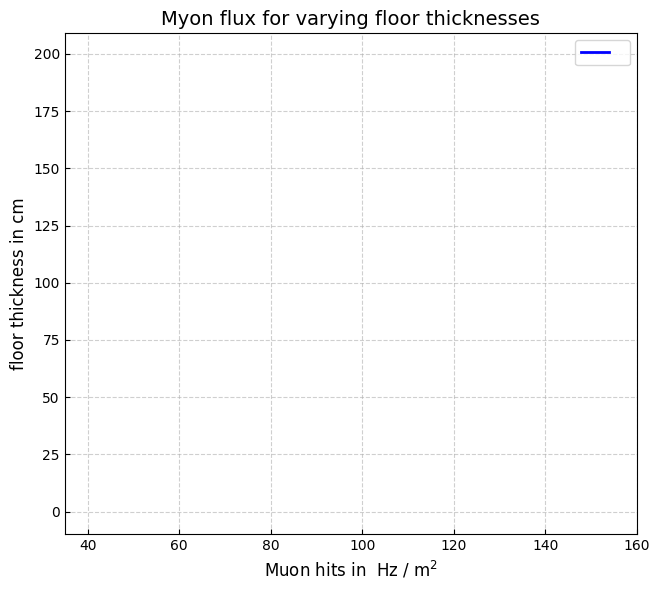

In [35]:
our_plot(flux_t, np.array([t]),
         'Myon flux for varying floor thicknesses',
         r'Muon hits in $\text{ Hz }/\text{ m}^{2}$',
         'floor thickness in cm',
        xmin=35,
        xmax=160)